In [127]:
# ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [128]:
#import libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan_df = pd.read_csv("bank_marketing_assignment.csv", sep=",")
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [129]:
# Drop the duration column

loan_df = loan_df.drop(['duration'],axis=1)

In [130]:
#check the number of null values
loan_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

We can note that, the dataset provided to us is clean and has no null values.

In [131]:
# convert yes to 1 and no to 0
# check data imbalance
loan_df['response'] = loan_df['response'].map({'yes': 1, 'no': 0})
loan_df['response'].value_counts()



0    36548
1     4640
Name: response, dtype: int64

In [132]:
# Copy the dataset into a back up dataframe for future use
loan_df_duplicate = loan_df

### Exploratory Data Analysis

- Job : type of job
- Age
- Education
- Housing: has housing loan?
- Default: has credit in default?
- Loan: has personal loan?
- Marital : marital status



## JOB

In [133]:
#count the number of job types
loan_df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [134]:
count_job = loan_df.groupby('job')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_job = loan_df.groupby('job')['response'].count().reset_index(name = 'No_of_prospects')
agg_job = count_job.merge(No_of_prospect_job, on = 'job')
agg_job['response_rate'] = 100*(agg_job['count_prospects']/agg_job['No_of_prospects']).round(2)
agg_job

,job,count_prospects,No_of_prospects,response_rate
0,admin.,1352,10422,13.0
1,blue-collar,638,9254,7.0
2,entrepreneur,124,1456,9.0
3,housemaid,106,1060,10.0
4,management,328,2924,11.0
5,retired,434,1720,25.0
6,self-employed,149,1421,10.0
7,services,323,3969,8.0
8,student,275,875,31.0
9,technician,730,6743,11.0


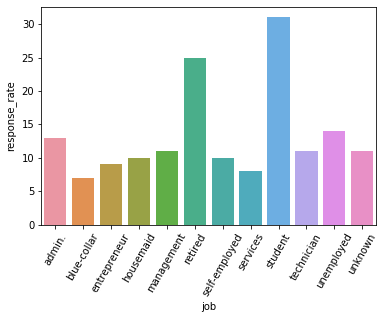

In [135]:
ax = sns.barplot(x='job', y='response_rate', data=agg_job)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.show()

1. The youngest and eldest were most likely to respond in a positive manner.
2. Student and retired have the highest response rates.

# AGE

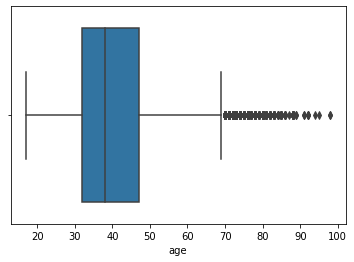

In [136]:
sns.boxplot(x='age', data=loan_df)
plt.show()

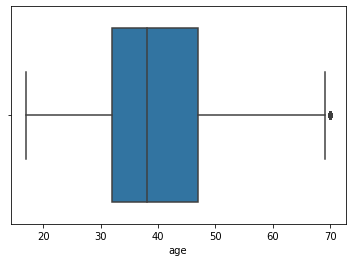

In [137]:
# remove outliers
loan_df['age'][loan_df['age']>70] = 70
sns.boxplot(x='age', data=loan_df)
plt.show()

In [138]:
# to further understand lets bin the data
bins = np.arange(10,loan_df['age'].max() + 10, 10)
loan_df['age_bins'] = pd.cut(loan_df['age'], bins, include_lowest=True)
No_of_prospect = loan_df.groupby('age_bins')['response'].count().reset_index(name = 'No.of_prospect')
count_prospects = loan_df[loan_df['response']==1].groupby('age_bins')['response'].count().reset_index(name = 'count_prospects')
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')
agg_age['response_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)
agg_age

,age_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",140,57,40.7
1,"(20.0, 30.0]",7243,1067,14.7
2,"(30.0, 40.0]",16385,1597,9.7
3,"(40.0, 50.0]",10240,837,8.2
4,"(50.0, 60.0]",6270,668,10.7
5,"(60.0, 70.0]",910,414,45.5


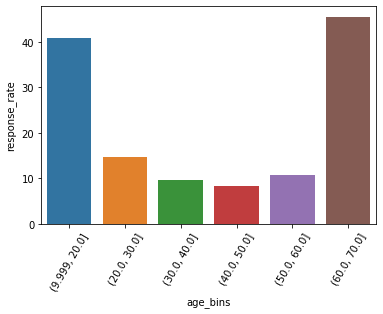

In [139]:
# let's plot the binned data.
ax = sns.barplot(x='age_bins', y='response_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.show()

As we can see, the youngest and the eldest are the most likely to buy the investment product being offered by the bank.

# EDUCATION

In [140]:
# let's understand the data distribution
loan_df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [141]:
# let's combine the entry types to make a clear distinction
loan_df.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.6y' : 'Primary_Education','basic.4y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

In [142]:
loan_df['education'].value_counts()

Primary_Education      12531
Tertiary_Education     12168
Secondary_Education     9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

In [143]:
# let's categorize the education according to the responce rate

count_prospects_education = loan_df.groupby('education')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_education = loan_df.groupby('education')['response'].count().reset_index(name = 'No_of_prospects')
agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'education')
agg_education['response_rate'] = 100*(agg_education['count_prospects']/agg_education['No_of_prospects']).round(3)
agg_education

,education,count_prospects,No_of_prospects,response_rate
0,Primary_Education,1093,12531,8.7
1,Secondary_Education,1031,9515,10.8
2,Tertiary_Education,1670,12168,13.7
3,professional.course,595,5243,11.3
4,unknown,251,1731,14.5


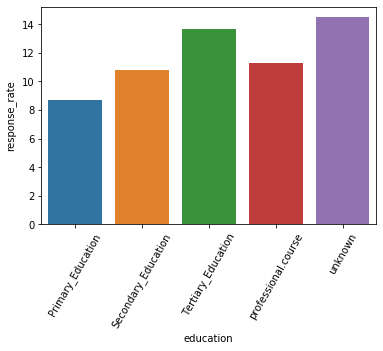

In [144]:
ax = sns.barplot(x='education', y='response_rate', data=agg_education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.show()

# HOUSING

In [145]:
loan_df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [146]:
# let's categorize the housing typre according to the response
count_prospects_housing = loan_df.groupby('housing')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_housing = loan_df.groupby('housing')['response'].count().reset_index(name = 'No_of_prospects')
agg_housing = count_prospects_housing.merge(No_of_prospect_housing, on = 'housing')
agg_housing['response_rate'] = 100*(agg_housing['count_prospects']/agg_housing['No_of_prospects']).round(3)
agg_housing

,housing,count_prospects,No_of_prospects,response_rate
0,no,2026,18622,10.9
1,unknown,107,990,10.8
2,yes,2507,21576,11.6


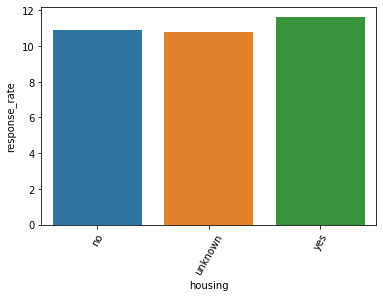

In [147]:
ax = sns.barplot(x='housing', y='response_rate', data=agg_housing)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.show()

There is barely any differnce in the responce of people with housing and without housing

# CREDIT DEFAULT

In [148]:
loan_df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [149]:
# let's categorize the default data according to response
count_prospects_default = loan_df.groupby('default')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_default = loan_df.groupby('default')['response'].count().reset_index(name = 'No_of_prospects')
agg_default = count_prospects_default.merge(No_of_prospect_default, on = 'default')
agg_default['response_rate'] = 100*(agg_default['count_prospects']/agg_default['No_of_prospects']).round(3)
agg_default

,default,count_prospects,No_of_prospects,response_rate
0,no,4197,32588,12.9
1,unknown,443,8597,5.2
2,yes,0,3,0.0


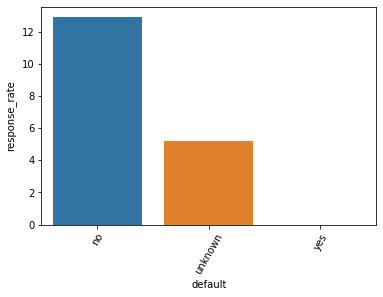

In [150]:
ax = sns.barplot(x='default', y='response_rate', data=agg_default)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.show()

Those who have not deafulted are the highest number of investors.

# LOAN


In [151]:
loan_df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [152]:
# categroize the loan on the basis of response
count_prospects_loan = loan_df.groupby('loan')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_loan = loan_df.groupby('loan')['response'].count().reset_index(name = 'No_of_prospects')
agg_loan = count_prospects_loan.merge(No_of_prospect_loan, on = 'loan')
agg_loan['response_rate'] = 100*(agg_loan['count_prospects']/agg_loan['No_of_prospects']).round(3)
agg_loan

,loan,count_prospects,No_of_prospects,response_rate
0,no,3850,33950,11.3
1,unknown,107,990,10.8
2,yes,683,6248,10.9


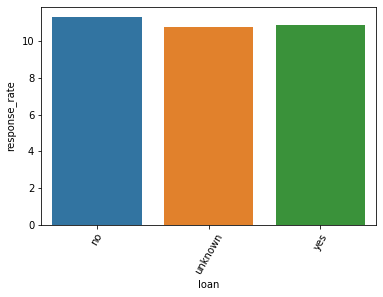

In [153]:
ax = sns.barplot(x='loan', y='response_rate', data=agg_loan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.show()

Those without loan have slightly higher psitive responce to investment product.

# Client Data: 
1. Contact
2. Month
3. Day of the week


# CONTACT:

In [154]:
loan_df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [155]:
count_prospects_contact = loan_df.groupby('contact')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_contact = loan_df.groupby('contact')['response'].count().reset_index(name = 'No_of_prospects')
agg_contact = count_prospects_contact.merge(No_of_prospect_contact, on = 'contact')
agg_contact['response_rate'] = 100*(agg_contact['count_prospects']/agg_contact['No_of_prospects']).round(3)
agg_contact

,contact,count_prospects,No_of_prospects,response_rate
0,cellular,3853,26144,14.7
1,telephone,787,15044,5.2


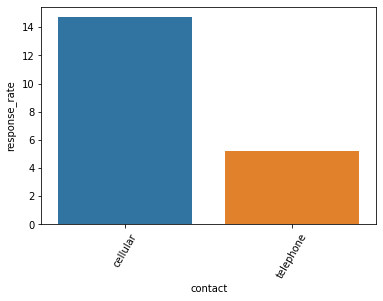

In [156]:
ax = sns.barplot(x='contact', y='response_rate', data=agg_contact)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.show()

The prospective customers contacted through cellular medium are significantly ore likely to opt in to the investment scheme compared to customers contacted through telephonic medium.

# MONTH:

In [157]:
loan_df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [158]:
count_prospects_month = loan_df.groupby('month')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_month = loan_df.groupby('month')['response'].count().reset_index(name = 'No_of_prospects')
No_of_prospect_month = loan_df.groupby('month')['response'].count().reset_index(name = 'No_of_prospects')
agg_month = count_prospects_month.merge(No_of_prospect_month, on = 'month')
agg_month['response_rate'] = 100*(agg_month['count_prospects']/agg_month['No_of_prospects']).round(3)
agg_month

,month,count_prospects,No_of_prospects,response_rate
0,apr,539,2632,20.5
1,aug,655,6178,10.6
2,dec,89,182,48.9
3,jul,649,7174,9.0
4,jun,559,5318,10.5
5,mar,276,546,50.5
6,may,886,13769,6.4
7,nov,416,4101,10.1
8,oct,315,718,43.9
9,sep,256,570,44.9


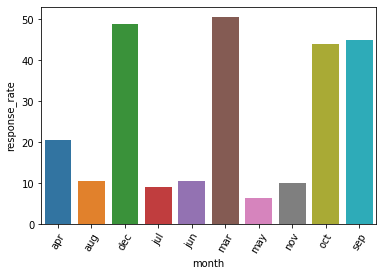

In [159]:
ax = sns.barplot(x='month', y='response_rate', data=agg_month)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.show()

Months of december, march, october and september appear to be the best to contact the potential customers.

# DAY OF WEEK

In [160]:
loan_df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [161]:
count_prospects_day = loan_df.groupby('day_of_week')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_day = loan_df.groupby('day_of_week')['response'].count().reset_index(name = 'No_of_prospects')
agg_day = count_prospects_day.merge(No_of_prospect_day, on = 'day_of_week')
agg_day['response_rate'] = 100*(agg_day['count_prospects']/agg_day['No_of_prospects']).round(3)
agg_day

,day_of_week,count_prospects,No_of_prospects,response_rate
0,fri,846,7827,10.8
1,mon,847,8514,9.9
2,thu,1045,8623,12.1
3,tue,953,8090,11.8
4,wed,949,8134,11.7


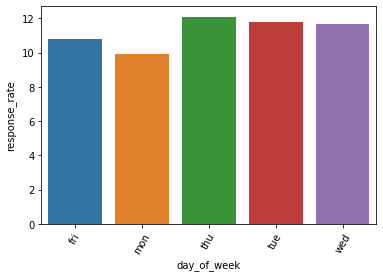

In [162]:
ax = sns.barplot(x='day_of_week', y='response_rate', data=agg_day)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.show()

# GAP AFTER LAST CONTACT

In [163]:
loan_df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [164]:
# let's categorize in 10 days, after 10 days and first time

loan_df['pdays'][loan_df['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])]='Contacted_in_first_10days'

loan_df['pdays'][loan_df['pdays'].isin([999])]='First_time_contacted'

loan_df['pdays'][~loan_df['pdays'].isin(['Contacted_in_first_10days','First_time_contacted'])]='Contacted_after_10days'
loan_df['pdays'].value_counts()

First_time_contacted         39673
Contacted_in_first_10days     1311
Contacted_after_10days         204
Name: pdays, dtype: int64

In [165]:
# let's categorize according to response
count_prospects_pdays = loan_df.groupby('pdays')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_pdays = loan_df.groupby('pdays')['response'].count().reset_index(name = 'No_of_prospects')
agg_pdays = count_prospects_pdays.merge(No_of_prospect_pdays, on = 'pdays')
agg_pdays['response_rate'] = 100*(agg_pdays['count_prospects']/agg_pdays['No_of_prospects']).round(3)
agg_pdays

,pdays,count_prospects,No_of_prospects,response_rate
0,Contacted_after_10days,116,204,56.9
1,Contacted_in_first_10days,851,1311,64.9
2,First_time_contacted,3673,39673,9.3


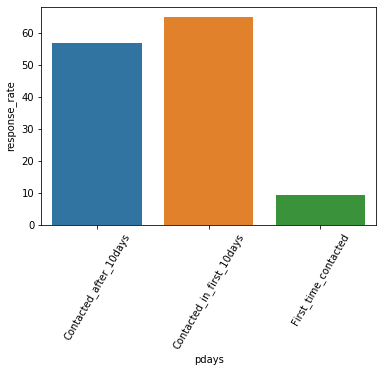

In [166]:
ax = sns.barplot(x='pdays', y='response_rate', data=agg_pdays)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.show()

# EMPLOYMENT VARIATION RATE

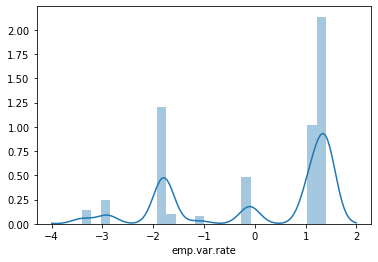

In [167]:
sns.distplot(loan_df['emp.var.rate'])
plt.show()

In [168]:
#let's devide the data in percentiles to understand even further

loan_df['emp.var.rate'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
95%          1.400000
99%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [169]:
count_prospects_emp_var_rate = loan_df.groupby('emp.var.rate')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_emp_var_rate = loan_df.groupby('emp.var.rate')['response'].count().reset_index(name = 'No_of_prospects')
agg_emp_var_rate = count_prospects_emp_var_rate.merge(No_of_prospect_emp_var_rate, on = 'emp.var.rate')
agg_emp_var_rate['response_rate'] = 100*(agg_emp_var_rate['count_prospects']/agg_emp_var_rate['No_of_prospects']).round(4)
agg_emp_var_rate

,emp.var.rate,count_prospects,No_of_prospects,response_rate
0,-3.4,454,1071,42.39
1,-3.0,88,172,51.16
2,-2.9,594,1663,35.72
3,-1.8,1461,9184,15.91
4,-1.7,403,773,52.13
5,-1.1,301,635,47.40
6,-0.2,1,10,10.00
7,-0.1,232,3683,6.30
8,1.1,240,7763,3.09
9,1.4,866,16234,5.33


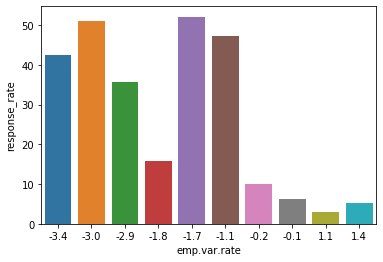

In [170]:
ax = sns.barplot(x='emp.var.rate', y='response_rate', data=agg_emp_var_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Negative employment rate directly related to higher response rates.

# Data Prepration 

In [171]:
# inspect the columns
loan_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

In [172]:
# Droping the column age_bins we had created for the purpose of data visualisation
loan_df.drop(columns = 'age_bins', inplace = True)

In [173]:
# Creating a dummy variable for the variable 'job' and dropping the first one.
job = pd.get_dummies(loan_df['job'],prefix='job',drop_first=True)

# Concatinating results in the data frame
loan_df = pd.concat([loan_df,job],axis=1)

In [174]:
# display the dataframe
loan_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


In [175]:
# Creating dummy variable for default column

default = pd.get_dummies(loan_df['default'],prefix='default',drop_first=True)
loan_df = pd.concat([loan_df,default],axis=1) 

In [176]:
# Creating dummy variable for marital column

marital = pd.get_dummies(loan_df['marital'],prefix='marital',drop_first=True)
loan_df = pd.concat([loan_df,marital],axis=1)

In [177]:
# Creating dummy variable for education column

education = pd.get_dummies(loan_df['education'],prefix='education',drop_first=True)
loan_df = pd.concat([loan_df,education],axis=1)

In [178]:
# Creating dummy variable for day_of_week column

day_of_week = pd.get_dummies(loan_df['day_of_week'],prefix='day_of_week',drop_first=True)
loan_df = pd.concat([loan_df,day_of_week],axis=1)

In [179]:
# Creating dummy variable for loan column

loan_fi= pd.get_dummies(loan_df['loan'],prefix='loan',drop_first=True)
loan_df = pd.concat([loan_df,loan_fi],axis=1)

In [180]:
# Creating dummy variable for housing column

housing = pd.get_dummies(loan_df['housing'],prefix='housing',drop_first=True)
loan_df = pd.concat([loan_df,housing],axis=1)

In [181]:
# Creating dummy variable for contact column

contact = pd.get_dummies(loan_df['contact'],prefix='contact',drop_first=True)
loan_df = pd.concat([loan_df,contact],axis=1)

In [182]:
# Creating dummy variable for poutcome column

poutcome = pd.get_dummies(loan_df['poutcome'],prefix='poutcome',drop_first=True)
loan_df = pd.concat([loan_df,poutcome],axis=1)

In [183]:
# Creating dummy variable for previous column

previous = pd.get_dummies(loan_df['previous'],prefix='previous',drop_first=True)
loan_df = pd.concat([loan_df,previous],axis=1)

In [184]:
# Creating dummy variable for pdays column

pdays = pd.get_dummies(loan_df['pdays'],prefix='pdays',drop_first=True)
loan_df = pd.concat([loan_df,pdays],axis=1)

In [185]:
# Creating dummy variable for month column

month = pd.get_dummies(loan_df['month'],prefix='month',drop_first=True)
loan_df = pd.concat([loan_df,month],axis=1)

In [186]:
# let's see the dataframe
loan_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays_First_time_contacted,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,0,1,0,0,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,1,0,0,0,0,0,1,0,0,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,1,0,0,0,0,0,1,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,0,1,0,0,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,1,0,0,0,0,0,1,0,0,0


In [187]:
# Drop all features for whom dummy variable has been created

loan_df.drop(columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','pdays','previous','poutcome'], inplace=True)

In [188]:
loan_df.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,job_entrepreneur,...,pdays_First_time_contacted,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,57,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,37,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,40,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,56,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [189]:
# let's create train and test dataset
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = loan_df.drop(['response'],axis=1)

# Putting response variable to y
y = loan_df['response']

In [190]:
# Splitting the data into train and test with test size = 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [191]:
# as we can see data needs standardization before we move on to use it further
# Standardisation continuous features for X_train

X_train_df = X_train[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
std_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()
X_train = X_train.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)
X_train = pd.concat([X_train,std_X_train_df],axis=1)
X_train.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_nov,month_oct,month_sep,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-0.878685,0.511177,0.649758,0.723298,0.891826,0.715448,0.333618
27175,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1.088841,0.152621,-0.114599,-0.650827,-0.319720,0.231937,0.400051
15817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-0.091675,0.152621,0.840847,0.591769,-0.471164,0.773077,0.847088
40971,0,0,0,0,1,0,0,0,0,0,...,0,1,0,2.761237,0.511177,-0.751563,1.773794,-1.942327,-1.509050,-2.813633
8467,0,0,0,0,0,0,0,0,1,0,...,0,0,0,-0.288427,0.152621,0.840847,1.538427,-0.276451,0.717753,0.847088


In [192]:
# Standardising continuous features for X_test
# Standardisation continuous features for X_train
X_test_df = X_test[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
std_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()
X_test = X_test.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)
X_test = pd.concat([X_test,std_X_test_df],axis=1)
X_test.head()


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_nov,month_oct,month_sep,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1.185515,-0.569409,-1.199007,-1.172918,-1.237193,-1.348603,-0.944859
27585,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0.101344,0.531371,-0.118526,-0.644728,-0.332420,0.226981,0.393573
15722,1,0,0,0,0,0,0,0,0,0,...,0,0,0,-0.591580,-0.569409,0.834840,0.590583,-0.483215,0.768913,0.840640
40349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1.185515,-0.202482,-1.135450,0.778116,0.464642,-1.574841,-2.432774
2576,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1.487193,-0.202482,0.644167,0.721340,0.873944,0.708890,0.327136


# GENERATING A PREDICTIVE MODEL USING LOGISTIC REGRESSION

In [193]:
# importing libraries

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [194]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28776
Model Family:                Binomial   Df Model:                           54
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 17 Feb 2020   Deviance:                          nan
Time:                        21:37:11   Pearson chi2:                 3.36e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -2.369e+15   1.17e+07  -2.02e+08      0.000   -2.37e+15   -2.37e+15
job_blue-collar                  6.095e+13   1.48e+06   4.13e+07      0.000     6.1e+13     6.1e+13
job_entrepreneur                 3.635e+13   2.27e+06    1.6e+07      0.000    3.63e+13    3.63e+13
job_housemaid                    6.828e+13   2.67e+06   2.55e+07      0.000    6.83e+13    6.83e+13
job_management                   1.164e+14   1.72e+06   6.77e+07      0.000    1.16e+14    1.16e+14
job_retired                     -1.666e+14   2.39e+06  -6.98e+07      0.000   -1.67e+14   -1.67e+14
job_self-employed                1.013e+14   2.31e+06   4.39e+07      0.000    1.01e+14    1.01e+14
job_services                    -2.271e+13   1.59e+06  -1.43e+07      0.000   -2.27e+13   -2.27e+13
job_student                     -4.637e+14   3.01e+06  -1.54e+08      0.000   -4.64e+14   -4.64e+14
job_technician                   1.697e+14   1.42e+06    1.2e+08      0.000     1.7e+14     1.7e+14
job_unemployed                  -1.467e+13   2.67e+06   -5.5e+06      0.000   -1.47e+13   -1.47e+13
job_unknown                      5.383e+13   4.63e+06   1.16e+07      0.000    5.38e+13    5.38e+13
default_unknown                  9.404e+12   1.05e+06      9e+06      0.000     9.4e+12     9.4e+12
default_yes                     -2.339e+15   4.75e+07  -4.93e+07      0.000   -2.34e+15   -2.34e+15
marital_married                  3.537e+13    1.3e+06   2.71e+07      0.000    3.54e+13    3.54e+13
marital_single                  -1.261e+14    1.5e+06  -8.39e+07      0.000   -1.26e+14   -1.26e+14
marital_unknown                  1.178e+14   8.92e+06   1.32e+07      0.000    1.18e+14    1.18e+14
education_Secondary_Education    6.942e+13   1.32e+06   5.25e+07      0.000    6.94e+13    6.94e+13
education_Tertiary_Education    -9.603e+13   1.37e+06     -7e+07      0.000    -9.6e+13    -9.6e+13
education_professional.course   -1.626e+14   1.61e+06  -1.01e+08      0.000   -1.63e+14   -1.63e+14
education_unknown                1.528e+13   2.14e+06   7.15e+06      0.000    1.53e+13    1.53e+13
day_of_week_mon                  1.773e+14   1.26e+06   1.41e+08      0.000    1.77e+14    1.77e+14
day_of_week_thu                  2.433e+14   1.26e+06   1.93e+08      0.000    2.43e+14    2.43e+14
day_of_week_tue                  3.064e+14   1.28e+06   2.39e+08      0.000    3.06e+14    3.06e+14
day_of_week_wed                  2.323e+14   1.27e+06   1.82e+08      0.000    2.32e+14    2.32e+14
loan_unknown                     1.431e+13   1.32e+06   1.09e+07      0.000    1.43e+13    1.43e+13
loan_yes                         -8.57e+12   1.11e+06  -7.73e+06      0.000   -8.57e+12   -8.57e+12
housing_unknown                  1.431e+13   1.32e+06   1.09e+07      0.000    1.43

In [196]:
# Let's further refine model using PCA and other techniques

# importing libraries
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# PCA

In [197]:
pca = PCA()
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)


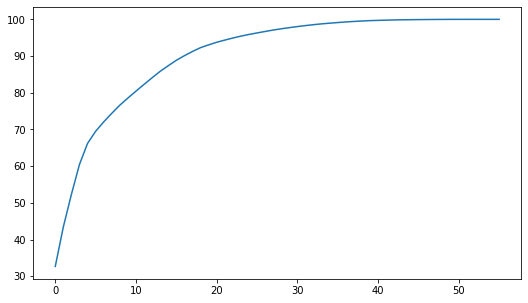

In [198]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

From the above graph we can see that, the appropriate number of Variables is 13

In [199]:
# create pipeline
PCA_VARS = 13
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8028510977766987

In [200]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[8999 1976]
 [ 523  859]]
AUC:    	 0.78


In [201]:
# let's use logistic regression and PCA.
# feed the models in a pipeline
logistic = LogisticRegression(class_weight='balanced')
pca = PCA
steps = [("pca", pca),
         ("logistic", logistic)
        ]
pca_logistic = Pipeline(steps)

In [ ]:
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [16,17,18,19,20], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')
# fit model
model.fit(X_train, y_train)

In [ ]:
# repeating the process to check model accuracy 

# predict churn on test data
y_pred = model.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

In [ ]:
# let's use the model to see what the model predicts

y_prob = model.predict_proba(X_test)
y_prob[:,1]



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))

In [ ]:
# for decile let's create a probability dataframe comapring actual and predicted
probabilities = pd.DataFrame()
probabilities['pred_prob'] = y_prob[:,1]
probabilities['actual'] = np.array(y_test)
probabilities['predicted'] = np.array(y_pred)

In [ ]:
probabilities.head()

In [ ]:
# decile
decile_df = probabilities

decile_df['decile'] = pd.qcut(decile_df['pred_prob'], 10, labels=np.arange(10, 0, -1))
# groupby the decile 
lift_df = decile_df.groupby('decile')['pred_prob'].count().reset_index()
lift_df.rename({'pred_prob':'total'}, axis=1, inplace=True)
lift_df_pred = decile_df[decile_df['actual']==1].groupby('decile')['actual'].count().reset_index()


In [ ]:
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')

In [ ]:
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)
lift_df_final['cumresp'] = lift_df_final['actual'].cumsum()
lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['actual']))


In [ ]:
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))
lift_df_final.head()

In [ ]:
lift_df_final.plot.line(x='decile', y=['gain'])

In [ ]:
lift_df_final.plot.line(x='decile', y=['cumlift'])